![Python_logo](https://www.python.org/static/community_logos/python-logo-master-v3-TM.png)


  # **Cortex Game: Round2--Probability of Giving**

> Before playing the game, you need to connect to SASPy first.
>
>> If it is your first time, please follow the 4 steps mentioned below!

***
## **Connect to SASPy**

**0- Connect to your Google Drive folder**

In [ ]:
my_folder = "/content/drive/MyDrive/Semestre7/InteligenciaArtificial2/RetoSAS"

from google.colab import drive
drive.mount('/content/drive')

# Change the following code to set your Drive folder
import os
os.chdir(my_folder)
!pwd

Mounted at /content/drive
/content/drive/MyDrive/Semestre7/InteligenciaArtificial2/RetoSAS


**1- Make sure that your Python version is 3.3 or higher as well as your Java version is 1.8.0_162 or higher**

In [ ]:
!echo "Python is at" $(which python)
!python --version

Python is at /usr/local/bin/python
Python 3.8.15


In [ ]:
!echo "Java is at" $(which java)
!/usr/bin/java -version

Java is at /usr/bin/java
openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu218.04, mixed mode, sharing)


**2- Install SASPy**

In [ ]:
pip install saspy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 5.2 MB/s 
  Created wheel for saspy: filename=saspy-4.4.1-py3-none-any.whl size=9937304 sha256=9ca86ba33df2bfe0b4d58bffb09c460d4defb2415e9faa175542d76b2cf419c9
  Stored in directory: /root/.cache/pip/wheels/0a/f6/ab/f7173c8a824856c66f6fd50194bb8fd3ef93fb4f1824be8d0c
Successfully built saspy


**3- Create the configuration file "sascfg_personal.py"**
Please, check that your Home Region is correct, you can check it at [ODA-SAS](https://welcome.oda.sas.com/home)

In [ ]:
%%writefile sascfg_personal.py
SAS_config_names=['oda']
oda = {'java' : '/usr/bin/java',
#US Home Region 1
#'iomhost' : ['odaws01-usw2.oda.sas.com','odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'],
#US Home Region 2
'iomhost' : ['odaws01-usw2-2.oda.sas.com','odaws02-usw2-2.oda.sas.com'],
#European Home Region 1
#'iomhost' : ['odaws01-euw1.oda.sas.com','odaws02-euw1.oda.sas.com'],
#Asia Pacific Home Region 1
#'iomhost' : ['odaws01-apse1.oda.sas.com','odaws02-apse1.oda.sas.com'],
#Asia Pacific Home Region 2
#'iomhost' : ['odaws01-apse1-2.oda.sas.com','odaws02-apse1-2.oda.sas.com'],
'iomport' : 8591,
'authkey' : 'oda',
'encoding' : 'utf-8'
}

Overwriting sascfg_personal.py


**4- Create your .authinfo**

If there is no .authinfo file, you can create this

In [ ]:
#%%writefile .authinfo
#oda user USR password PSW

Copy this file to home

In [ ]:
!cp .authinfo ~/.authinfo

**5- Establish Connection (Need to do this step each time you use SASPy)**

In [ ]:
import saspy
sas_session = saspy.SASsession(cfgfile=os.path.join(
    my_folder,"sascfg_personal.py"))
sas_session

Using SAS Config named: oda
SAS Connection established. Subprocess id is 353



Access Method         = IOM
SAS Config name       = oda
SAS Config file       = /content/drive/MyDrive/Semestre7/InteligenciaArtificial2/RetoSAS/sascfg_personal.py
WORK Path             = /saswork/SAS_workD77C00011A27_odaws01-usw2-2.oda.sas.com/SAS_work1D6C00011A27_odaws01-usw2-2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 4.4.1
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 72231


***
## Connect to Cortex Data Sets

Load Cortex datasets from SAS Studio

In [ ]:
ps = sas_session.submit("""
    libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
    """)
print(ps["LOG"])


5                                                          The SAS System                      Friday, December  2, 2022 12:53:00 PM

24         ods listing close;ods html5 (id=saspy_internal) file=_tomods1 options(bitmap_mode='inline') device=svg style=HTMLBlue;
24       ! ods graphics on / outputfmt=png;
25         
26         
27             libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';
28         
29         
30         
31         ods html5 (id=saspy_internal) close;ods listing;
32         

6                                                          The SAS System                      Friday, December  2, 2022 12:53:00 PM

33         


For local Jupyter

In [ ]:
#%%SAS sas_session
#libname cortex '~/my_shared_file_links/u39842936/Cortex Data Sets';

### Transform cloud SAS dataset to Python dataframe (pandas)

For reference: 

1. [Pandas library](https://pandas.pydata.org/docs/user_guide/index.html)


2. [sklearn.model_selection for data partition](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
import pandas as pd

data1 = sas_session.sasdata2dataframe(
table='hist',
libref='cortex'
)

data2 = sas_session.sasdata2dataframe(
table='target_rd2',
libref='cortex'
)

## Merge the Data

In [ ]:
data_merge = pd.merge(data1, data2, on=["ID"],how="right")
#data_merge.head()
data_merge.sample(2)

,ID,LastName,FirstName,Woman,Age,Salary,Education,City,SeniorList,NbActivities,...,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
664731,2664732.0,ALVAREZ,SHARI,1.0,53.0,31800.0,University / College,City,5.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
676230,2676231.0,PENA,CHARLES,0.0,78.0,45900.0,High School,City,3.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


## Treating Missing Values

Please be aware that deleting all missing values can induce a selection bias. 
Some missing values are very informative. For example, when MinGift is missing, it means that the donor never gave in the past 10 years (leading to but excluding last year). Instead of deleting this information, replacing it by 0 is more appropriate!

A good understanding of the business case and the data can help you come up with more appropriate strategies to deal with missing values.

In [ ]:
data_mergefloats = data_merge.loc[:, ~data_merge.columns.isin(['LastName', 'FirstName', 'Education', 'City'])]

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(imputation_order='ascending',max_iter=10,random_state=42,n_nearest_features=3)

In [ ]:
for i in data_mergefloats:
  data_mergefloats.loc[:,i]=imputer.fit_transform(data_mergefloats[[i]])
data_mergefloats = data_mergefloats.sort_index()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

## Data Partition

In [ ]:
# The code below is an illustration on how to sample data on train and validation samples.
# You could use another library or a built-in function to perform sampling.

from sklearn.model_selection import train_test_split
train, validation = train_test_split(data_mergefloats, test_size=0.3, random_state=12345) 

#train.head()
train.sample(2) 

,ID,Woman,Age,Salary,SeniorList,NbActivities,Referrals,Recency,Frequency,Seniority,TotalGift,MinGift,MaxGift,GaveLastYear,AmtLastYear,Contact,GaveThisYear,AmtThisYear
424430,2424431.0,0.0,52.0,12500.0,7.0,0.0,0.0,5.000000,2.000000,6.000000,70.000000,30.000000,40.000000,0.0,0.0,0.0,1.0,10.0
99814,2099815.0,1.0,58.0,80500.0,0.0,0.0,0.0,3.039636,1.666882,4.474148,104.454055,43.130251,85.897932,0.0,0.0,0.0,0.0,0.0


### Finding a good model

In [ ]:
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [ ]:
X_train = train[['Age', 'Salary','MinGift', 'GaveLastYear', 'Contact','Woman', 'NbActivities' ]] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'GaveLastYear', 'Contact', 'Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

In [ ]:
rate_values=[0.075]
rate_scores=[]
for i in rate_values:
    boosting_classifier= XGBClassifier(n_estimators=100, learning_rate=i,max_depth=5, random_state=0)
    boosting_classifier=boosting_classifier.fit(X_train, Y_train)
    rate_scores.append(boosting_classifier.score(X_valid, Y_valid)) 

In [ ]:
rate_scores

[0.8573566666666667, 0.8573266666666667, 0.85729]

In [ ]:
depth_values=[6]
depth_scores=[]
for i in depth_values:
    boosting_classifier= XGBClassifier(n_estimators=100, learning_rate=0.075,max_depth=i, random_state=0)
    boosting_classifier=boosting_classifier.fit(X_train, Y_train)
    depth_scores.append(boosting_classifier.score(X_valid, Y_valid))

In [ ]:
depth_scores

[0.8573566666666667, 0.85737]

In [ ]:
estimators_values=[100]
estimators_scores=[]
for i in estimators_values:
    boosting_classifier= XGBClassifier(n_estimators=i, learning_rate=0.075,max_depth=6, random_state=0)
    boosting_classifier=boosting_classifier.fit(X_train, Y_train)
    estimators_scores.append(boosting_classifier.score(X_valid, Y_valid))

In [ ]:
estimators_scores

[0.85737, 0.85734]

### Implementing of XGBoost

In [ ]:
#comment: it's numpy array ==> categorical variables
from xgboost import XGBClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X_train = train[['Age', 'Salary','MinGift', 'GaveLastYear', 'Contact','Woman', 'NbActivities' ]] 
Y_train = train['GaveThisYear']
X_valid = validation[['Age', 'Salary','MinGift', 'GaveLastYear', 'Contact', 'Woman', 'NbActivities']] 
Y_valid = validation['GaveThisYear']

bst = XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.075, objective='reg:linear')
bst.fit(X_train, Y_train)
preds = bst.predict(X_valid)

[14:24:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
preds

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_valid, preds))

              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92    255349
         1.0       0.61      0.11      0.19     44651

    accuracy                           0.86    300000
   macro avg       0.74      0.55      0.56    300000
weighted avg       0.83      0.86      0.81    300000



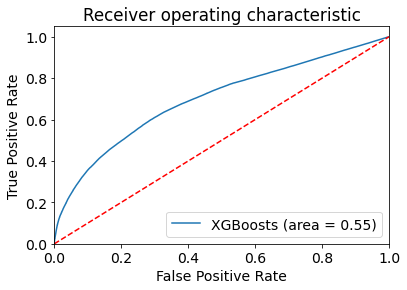

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

logit_roc_auc = roc_auc_score(Y_valid, bst.predict(X_valid))
fpr, tpr, thresholds = roc_curve(Y_valid, bst.predict_proba(X_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoosts (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Scoring New Data

### Prepare data for scoring

In [ ]:
data3 = sas_session.sasdata2dataframe(
table='score',
libref='cortex'
)
data4 = sas_session.sasdata2dataframe(
table='score_rd2_contact',
libref='cortex'
)
data5 = sas_session.sasdata2dataframe(
table='SCORE_RD2_NOCONTACT',
libref='cortex'
)

 ### Score new data based on your champion model
 
 Pick your champion model from previous steps and use it to predict next year donations. 
 
 In this case, the Decision Tree model performed better than the Logistic Regression model based on the AUC criterion.

### Predict 'probability of giving' for members who were contacted

In [ ]:
scoring_data_contact = pd.merge(data3, data4, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_contact[['MinGift']] = scoring_data_contact[['MinGift']].fillna(value=0) 

#scoring_data_contact.head()

X = scoring_data_contact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
preds_predict_contact=bst.predict_proba(X)[:,1]
scoring_data_contact['Prediction_prob'] = preds_predict_contact

scoring_data_contact= scoring_data_contact[['ID','Prediction_prob']]
scoring_data_contact = scoring_data_contact.rename({'Prediction_prob': 'ProbContact'}, axis=1) 
scoring_data_contact.head()

,ID,ProbContact
0,2000001.0,0.294120
1,2000002.0,0.605165
2,2000003.0,0.613329
3,2000004.0,0.381125
4,2000005.0,0.525580


### Predict 'probability of giving' for members who were not contacted

In [ ]:
scoring_data_nocontact = pd.merge(data3, data5, on=["ID"],how="right")

# Perform the same strategy for handling missing values for the score dataset.
# In this case, we will only replace missing values of the MinGift variable.

scoring_data_nocontact[['MinGift']] = scoring_data_nocontact[['MinGift']].fillna(value=0) 

#scoring_data_contact.head()

X = scoring_data_nocontact[['Age','Salary','MinGift','GaveLastYear','Contact','Woman', 'NbActivities']] 
preds_predict_nocontact=bst.predict_proba(X)[:,1]
scoring_data_nocontact['Prediction_prob'] = preds_predict_nocontact

scoring_data_nocontact= scoring_data_nocontact[['ID','Prediction_prob']]
scoring_data_nocontact = scoring_data_nocontact.rename({'Prediction_prob': 'ProbNoContact'}, axis=1) 
scoring_data_nocontact.head()

,ID,ProbNoContact
0,2000001.0,0.117847
1,2000002.0,0.172438
2,2000003.0,0.116006
3,2000004.0,0.108154
4,2000005.0,0.114708


In [ ]:
result_Prob = pd.merge(scoring_data_contact, scoring_data_nocontact, on=["ID"],how="right")
result_Prob.sort_values(by=['ID'], inplace=True)
result_Prob.sample(10)

,ID,ProbContact,ProbNoContact
229066,2229067.0,0.389021,0.190349
653900,2653901.0,0.495923,0.118750
603932,2603933.0,0.369800,0.113923
538245,2538246.0,0.283733,0.122012
847378,2847379.0,0.152006,0.275320
949049,2949050.0,0.264313,0.165663
330118,2330119.0,0.169929,0.116072
973723,2973724.0,0.288597,0.167578
321875,2321876.0,0.281615,0.145094
755612,2755613.0,0.385908,0.115885


## Exporting Results to a CSV File

In [ ]:
result_Prob.to_csv('Round2_Output_prob.csv', index=False)

In [ ]:
import pandas as pd

NB = 190000

probabilities = pd.read_csv("Round2_Output_prob.csv")
amounts = pd.read_csv("Round2_Output_amt.csv")

def Calc_Uplift(raw_data):
    return ((raw_data['AmtContact']*raw_data['ProbContact']) - (raw_data['AmtNoContact']*raw_data['ProbNoContact']))

raw_submission = pd.merge(probabilities, amounts, on=["ID"], how="right")
raw_submission["Uplift"] = raw_submission.apply(lambda row: Calc_Uplift(row), axis=1)

# Sorting data by descending Uplift value
raw_submission.sort_values(by=['Uplift'], ascending=False, inplace=True)


In [ ]:
raw_submission = raw_submission[['ID']].astype(int)

In [ ]:
raw_submission = raw_submission.loc[:, ~raw_submission.columns.isin(['ProbContact', 'ProbNoContact', 'AmtContact', 'AmtNoContact,Uplift'])]

In [ ]:
# Export the final csv file


submission = raw_submission.head(NB)

submission.to_csv('Round2 Output final.csv', index=False, header = False)


In [ ]:
!head Round2\ Output\ final.csv

2663070
2347623
2083884
2140219
2235710
2460028
2988862
2754639
2958375
2968389
